## Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
boston_data=pd.DataFrame(data=boston.data)
boston_price=boston.target
x_train, x_test, y_train, y_test = train_test_split(boston_data, boston_price, test_size=0.3)

### Data Standardization

In [4]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(np.array(x_train))
x_test=std_scaler.transform(np.array(x_test))

In [5]:
new_x_train1 = pd.DataFrame(data=x_train)
new_x_train1['PRICE'] = y_train

In [6]:
x_test = pd.DataFrame(data = x_test)
y_test = pd.DataFrame(data = y_test)

In [7]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### SGD Model

In [8]:
def gradient_descent(x_train1, lr_rate_type = 'constant', step_size=0.01, power_t=0.25, iterations =100,batch_size=10):

    w_init = np.random.randn(1,13)
    b_init = np.random.randn()
    lr_rate = step_size
    
    x_i_1= x_train1.drop('PRICE',axis=1)
    y_i_1= x_train1['PRICE']
    
    k = 1
    
    for i in range(iterations):

        w_init1 = np.zeros((1,13))
        b_init1 = 0
        
        ind = np.random.choice(x_train1.shape[0],batch_size,replace=False)
        x_i = x_i_1.iloc[ind].values
        y_i = y_i_1.iloc[ind].values
        
        
        for j in range(batch_size):
            error = y_i[j] - (np.dot(w_init,x_i[j]) + b_init)
            w_init1 += np.multiply(x_i[j] , error)
            b_init1 += error
        
            
        w_init1 *= (-2 / x_i.shape[0])
        b_init1 *= (-2 / x_i.shape[0])
        
        
        w_new = w_init - (step_size * w_init1)
        b_new = b_init - (step_size * b_init1)
        
        
        if(lr_rate_type == 'invscaling'):
            lr_rate = step_size / pow(k, power_t)
        
        k = k + 1
        
        w_init = w_new
        b_init = b_new
        
    return w_init, b_init

In [9]:
opt_w, opt_b = gradient_descent(x_train1 = new_x_train1, lr_rate_type ='invscaling', iterations = 1000,step_size = 0.01,batch_size=10)

### Optimal W, Optimal B of SGD Model

In [10]:
print('Optimal W',opt_w.T)
print('Optimal B',opt_b[0])

Optimal W [[-0.54767835]
 [ 1.30143185]
 [-0.2658944 ]
 [ 0.38518663]
 [-1.71868209]
 [ 2.91983072]
 [-0.32896391]
 [-3.09521216]
 [ 2.39775317]
 [-2.2754071 ]
 [-1.94394232]
 [ 0.9971672 ]
 [-3.71769808]]
Optimal B 23.039515069984382


### Prediction

In [11]:
final_y = ((x_test.values).dot((opt_w).T) + opt_b)

In [12]:
final_y[:5]

array([[16.84939899],
       [20.13649072],
       [28.54832251],
       [12.11165723],
       [29.2368492 ]])

### Mean Squared Error of SGD Model

In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.values,final_y)
mse

26.30893343430181

In [14]:
np.sqrt(mse)

5.129223472836976

### Plot of Actual Y vs Predicted Y of Model

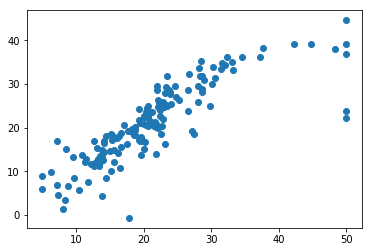

In [15]:
plt.scatter(y_test.values,final_y)

### R2 Score of SGD Model

In [16]:
from sklearn.metrics import r2_score
score = r2_score(np.array(y_test), final_y)
score

0.6876097001485982

### SGD Model of Scikit Learn

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=1000, penalty=None, eta0=0.01,learning_rate = 'invscaling',alpha=0.01)
sgd_reg.fit(x_train, y_train)

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=1000, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [25]:
pred1 = sgd_reg.predict(x_test)

### R2 Score of Scikit Learn Model

In [26]:
score = r2_score(y_test.values, pred1)
score

0.7045635674109157

### Mean Squared Error of Scikit Learn Model

In [27]:
mse = mean_squared_error(np.array(y_test),pred1)
np.sqrt(mse)

4.988096839646018

### Plot of Actual Y vs Predicted Y of Scikitlearn SGD model

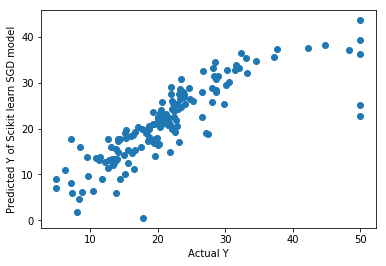

In [28]:
plt.scatter(y_test.values,pred1)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y of Scikit learn SGD model')
plt.show()

### Optimal W of Scikit learn SGD Model

In [29]:
sgd_reg.coef_

array([-0.66485173,  1.29320581,  0.030344  ,  0.59477814, -1.59483774,
        2.77790233, -0.44639552, -3.19025143,  2.87233438, -2.69296884,
       -1.91609357,  1.05706966, -3.45844088])

### Optimal B of Scikit learn SGD Model

In [30]:
sgd_reg.intercept_

array([23.02142443])

### Plot of Predicted Y of SGD Model vs Predicted Y of Scikitlearn SGD model

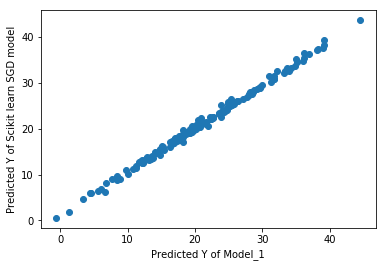

In [31]:
plt.scatter(final_y,pred1)
plt.xlabel('Predicted Y of Model_1')
plt.ylabel('Predicted Y of Scikit learn SGD model')
plt.show()